In [1]:
import matplotlib.pyplot as plt

import numpy as np

import keras

from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

from keras import optimizers as optimizers

from keras.utils.np_utils import to_categorical

from PIL import Image

Using TensorFlow backend.


In [2]:
#carrega o banco de dados do mnist

(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [3]:
#xTrain
#len(xTrain)
#xTrain.shape
#yTrain
#yTrain.shape

In [4]:
#One-hot encoding
yTeste = to_categorical(yTest)
yTreino = to_categorical(yTrain)
print(yTreino[0])
print(yTreino[1])
print(yTreino[2])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [5]:
#visualizando exemplo de imagem

data = xTrain[0]
img = Image.fromarray(data, 'L') #'L' para imagem em escala de cinza (8-bit)

#img

In [6]:
w, h = 32,32
img = img.resize((w,h), Image.ANTIALIAS)
img

a = np.asarray(img)

img = Image.fromarray(a, 'L') #'L' para imagem em escala de cinza (8-bit)
#img

In [7]:
#ajuste das dimensões das imagens de treino

w, h = 32, 32

auxList = []

for i in range(len(xTrain)):
    
    img = Image.fromarray(xTrain[i], 'L') #'L' para imagem em escala de cinza (8-bit)

    img = img.resize((w,h), Image.ANTIALIAS)
    
    auxList.append(np.asarray(img))

xTreino = np.array(auxList)        
#xTreino.shape

xTreino = xTreino.reshape((60000,32,32,1))

In [8]:
np.array_equal(xTreino[0], xTreino[3])

False

In [9]:
#ajuste das dimensões das imagens de teste

w, h = 32, 32

auxList = []

for i in range(len(xTest)):
    
    img = Image.fromarray(xTest[i], 'L') #'L' para imagem em escala de cinza (8-bit)

    img = img.resize((w,h), Image.ANTIALIAS)

    auxList.append(np.asarray(img))

xTeste = np.array(auxList)
#xTeste.shape

xTeste = xTeste.reshape((10000, 32, 32, 1))

In [10]:
'''#visualizando exemplo de imagem

data = xTreino[0]
img = Image.fromarray(data, 'L') #'L' para imagem em escala de cinza (8-bit)

#print(data.shape)
img'''

"#visualizando exemplo de imagem\n\ndata = xTreino[0]\nimg = Image.fromarray(data, 'L') #'L' para imagem em escala de cinza (8-bit)\n\n#print(data.shape)\nimg"

In [11]:
def leNet():
    
    classificador = Sequential()
    
    #imagem 32x32
    #Camada convolucional 1
    classificador.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', kernel_initializer='random_uniform', input_shape = (32,32,1)))
    
    #imagem 28x28
    #Camada de pooling 1
    classificador.add(MaxPooling2D(pool_size = 2, strides = 2))
    
    #imagem 14x14
    #Camada convolucional 2
    classificador.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu', kernel_initializer='random_uniform', input_shape = (14,14,6)))
    
    #imagem 10x10
    #Camada de pooling 2
    classificador.add(MaxPooling2D(pool_size = 2, strides = 2))
    
    #imagem 5x5
    #Flatten
    classificador.add(Flatten())
    
    #Camada totalmente conectada 1
    classificador.add(Dense(units = 120, activation = 'relu', kernel_initializer='random_uniform'))
    
    #Camada totalmente conectada 2
    classificador.add(Dense(units = 84, activation = 'relu',  kernel_initializer='random_uniform'))
    
    #Camada de saída
    classificador.add(Dense(units = 10, activation = 'softmax',  kernel_initializer='random_uniform'))
    
    adam = optimizers.Adam(lr=0.001, decay=0.00001)
    #sgd = optimizers.SGD(lr=0.1, decay=0.01)
    
    classificador.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return  classificador

In [12]:
model = leNet()
#print(xTreino.shape)
history = model.fit(xTreino, yTreino, validation_split=0.16665, epochs=75, batch_size=400, initial_epoch=-1)

Train on 50001 samples, validate on 9999 samples
Epoch 0/75
50001/50001 [==============================] - 38s 754us/step - loss: 0.3603 - acc: 0.8956 - val_loss: 0.1080 - val_acc: 0.9682
Epoch 1/75
50001/50001 [==============================] - 37s 730us/step - loss: 0.0906 - acc: 0.9726 - val_loss: 0.0891 - val_acc: 0.9723
Epoch 2/75
50001/50001 [==============================] - 37s 730us/step - loss: 0.0633 - acc: 0.9803 - val_loss: 0.0671 - val_acc: 0.9801
Epoch 3/75
50001/50001 [==============================] - 37s 732us/step - loss: 0.0485 - acc: 0.9852 - val_loss: 0.0603 - val_acc: 0.9815
Epoch 4/75
50001/50001 [==============================] - 37s 739us/step - loss: 0.0400 - acc: 0.9869 - val_loss: 0.0545 - val_acc: 0.9838
Epoch 5/75
50001/50001 [==============================] - 37s 739us/step - loss: 0.0341 - acc: 0.9891 - val_loss: 0.0462 - val_acc: 0.9863
Epoch 6/75
50001/50001 [==============================] - 36s 728us/step - loss: 0.0273 - acc: 0.9908 - val_loss: 0.0

50001/50001 [==============================] - 38s 768us/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0622 - val_acc: 0.9904
Epoch 59/75
50001/50001 [==============================] - 37s 745us/step - loss: 0.0061 - acc: 0.9983 - val_loss: 0.0874 - val_acc: 0.9860
Epoch 60/75
50001/50001 [==============================] - 41s 812us/step - loss: 0.0029 - acc: 0.9990 - val_loss: 0.0691 - val_acc: 0.9894
Epoch 61/75
50001/50001 [==============================] - 37s 740us/step - loss: 0.0038 - acc: 0.9990 - val_loss: 0.0683 - val_acc: 0.9890
Epoch 62/75
50001/50001 [==============================] - 37s 741us/step - loss: 0.0031 - acc: 0.9990 - val_loss: 0.0717 - val_acc: 0.9901
Epoch 63/75
50001/50001 [==============================] - 37s 744us/step - loss: 0.0456 - acc: 0.9892 - val_loss: 0.0582 - val_acc: 0.9881
Epoch 64/75
50001/50001 [==============================] - 37s 739us/step - loss: 0.0061 - acc: 0.9979 - val_loss: 0.0598 - val_acc: 0.9904
Epoch 65/75
50001/50001 [=======

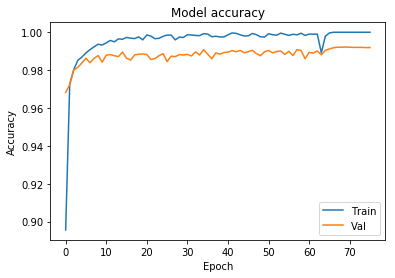

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

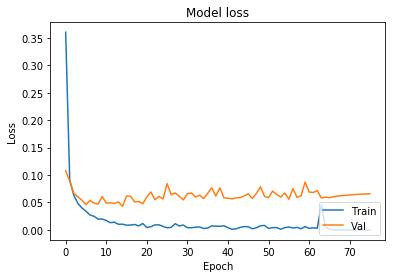

In [14]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [15]:
pred = model.evaluate(xTeste, yTeste)

10000/10000 [==============================] - 4s 450us/step


In [16]:
pred

[0.06066793866320372, 0.991]